<div align="center" style="font-family: 'Garamond', serif; color: #333333;">
    <h2 style="color: #8b0000; text-decoration: underline; font-variant: small-caps;">
        <span style="font-family: 'Courier New', monospace;">&#9472;</span>
        Reinforcement Learning Summer 2024
        <span style="font-family: 'Courier New', monospace;">&#9472;</span>
    </h2>
    <h2 style="color: #6c757d;">Prof. Dr. Frank Kirchner</h2>
    <h4 style="color: #6c757d; font-style: italic;">Exercise Sheet – I</h4>
    <h5 style="color: #6c757d;">Due: 30.04.25</h5>
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
</div>

<div style="text-align: center; font-size: 24px;">

- **Name:** AHTASHAM ILYAS  
- **E-mail:** o_yfodc2@uni-bremen.de

</div>


## Problem 1.1 (Installation & Framework)

For this course, we make use of the **gymnasium framework**. Gymnasium is a standard API for reinforcement learning and also provides a broad collection of environments we will discuss during this course. The documentation of the framework can be found at [gymnasium.farama.org](http://gymnasium.farama.org).

Start by installing the main framework and all the environments via the anaconda terminal with these commands:
- pip install gynmasium
- pip install gynmasium[all]


### a) Try to run the code from the main page of the gymnasium documentation. 

You can fix possible errors related to Microsoft Visual C++ 14.0 by downloading the Microsoft C++ Build Tools and installing the missing package.

**Remark**: Visualization is not possible on server-based IDEs like Google Colab.

### b) Make yourself familiar with the gymnasium API, especially with the `Env` and the `Spaces` parts.


In [2]:
# Todo: Install the required libraries, test them by running the code from main page & familiarise yourself with the gymnasium API

---
### Problem 1.2 (Markov Decision Processes) (10 P.)
Using the framework you are now supposed to implement a simple environment
yourself with the help of this 
[tutorial](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/). (You do not need 
to run the code in the beginning)

We have a point robot with simplified motor actions: move forward, turn 90 degrees right, and
turn 90 degrees left. All actions can be tried in all states. A simple version of the robot world and 
its states are shown in Figure 1. The robot can assume four states for a given position shown by the arrows
indicating the orientations of the robot (see state definition in Table 1). In the table N, E, S, and W
stand for north, east, south, and west, respectively. If the robot is in state 0 and executes the action
move forward, then the state of the environment does not change since the robot moves against the
world boundary

**Figure 1: The Robot world**

<p style="text-align:center;">
<img src="RobotWorld.jpg" alt="Robot world" width="500">
</p>


<p align="center">
  
### Table 1: The state definition of the perceived states

</p>

<div style="margin: 0 auto; width: 50%;">
  
<table>
  <tr>
    <th>State</th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
  </tr>
  <tr>
    <td><strong>Position</strong></td>
    <td>I</td>
    <td>I</td>
    <td>I</td>
    <td>I</td>
    <td>II</td>
    <td>II</td>
    <td>II</td>
    <td>II</td>
    <td>III</td>
    <td>III</td>
    <td>III</td>
    <td>III</td>
    <td>IV</td>
    <td>IV</td>
    <td>IV</td>
    <td>IV</td>
  </tr>
  <tr>
    <td><strong>Orientation</strong></td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
  </tr>
</table>

</div>

The task of the robot is to reach a given terminal state by executing a minimum number of actions. In this exercise, we take state 15 as a terminal state. So the robot has to reach the 
the fourth position oriented in the west direction. The dynamics of the environment are given by 

$$
\begin{array}{l}
    P_{ss'}^a = \left\{
    \begin{array}{ll}
        1 & \text{if $s'$ is a valid next state} \\
        0 & \text{otherwise}
    \end{array} \right. \\
                    \\
    R_{ss'}^a = \left\{
    \begin{array}{ll}
        -1 & \text{if $s' = s$ and $s' \neq$ terminal state}  \\
        1 & \text{if $s' \neq s$ and $s' =$ terminal state}\\
        0 & \text{otherwise}
    \end{array} \right.
\end{array}
\tag{1}
$$


where $ P_{ss'}^a $ is the state transition probability and $ R_{ss'}^a $ is the expected immediate reward. One can easily see that the robot is discouraged to take actions against the world boundary.



### **1.2 A:  (5 points)** Modify the  following cell ` The robot world` according to the description above.

In [1]:
import gymnasium as gym
from gymnasium import spaces
import pygame
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class RobotWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 0.8}

    def __init__(self, render_mode=None, size=4, slip_prob=0.0):
        self.size = size  # The size of the square grid
        self.window_size = 512  # The size of the PyGame window
        
        # Add slip probability parameter (0 to 1)
        self.slip_prob = min(1.0, max(0.0, slip_prob))  # Ensure between 0 and 1

        # In this environment, we have size*4 states (size positions x 4 orientations)
        self.observation_space = spaces.Discrete(self.size * 4)  # 4 orientations for each position

        # We have 3 actions: 0=move forward, 1=turn right, 2=turn left
        self.action_space = spaces.Discrete(3)

        # Mapping of state number to position and orientation
        self.state_to_pos_orient = {}
        self.pos_orient_to_state = {}
        
        # Initialize the state mappings
        self._init_state_mappings()
        
        # Orientations: 0=N, 1=E, 2=S, 3=W
        self.orientations = ["N", "E", "S", "W"]
        
        # Direction vectors for each orientation [y, x]
        self.orientation_to_direction = {
            0: np.array([1, 0]),   # North: move up (+y)
            1: np.array([0, 1]),   # East: move right (+x)
            2: np.array([-1, 0]),  # South: move down (-y)
            3: np.array([0, -1]),  # West: move left (-x)
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None
        
        # The terminal state is now randomized in reset()
        self.terminal_state = None

    def _init_state_mappings(self):
        """Initialize mappings between state numbers and (position, orientation) pairs"""
        state = 0
        for position in range(self.size):  # Positions 0 to size-1
            for orientation in range(4):  # Orientations 0-3 (N, E, S, W)
                self.state_to_pos_orient[state] = (position, orientation)
                self.pos_orient_to_state[(position, orientation)] = state
                state += 1

    def _get_obs(self):
        return self._state

    def _get_info(self):
        position, orientation = self.state_to_pos_orient[self._state]
        terminal_position, terminal_orientation = self.state_to_pos_orient[self.terminal_state]
        
        # Calculate Manhattan distance between current position and terminal position
        distance = abs(position - terminal_position)
        
        return {
            "position": position,
            "orientation": self.orientations[orientation],
            "distance_to_goal": distance,
            "is_terminal": self._state == self.terminal_state
        }

    def reset(self, seed=None, options=None):
        # Seed the random number generator
        super().reset(seed=seed)

        # Choose a random terminal state
        self.terminal_state = self.np_random.integers(0, self.size * 4)
        
        # Start at a random state (random position and orientation)
        self._state = self.np_random.integers(0, self.size * 4)
        
        # Make sure initial state is not the terminal state
        while self._state == self.terminal_state:
            self._state = self.np_random.integers(0, self.size * 4)

        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info

    def step(self, action):
        current_position, current_orientation = self.state_to_pos_orient[self._state]
        next_position, next_orientation = current_position, current_orientation
        
        # Determine if the robot slips
        robot_slips = self.np_random.random() < self.slip_prob
        
        if not robot_slips:  # Only execute the action if the robot doesn't slip
            # Process the action
            if action == 0:  # Move forward
                direction = self.orientation_to_direction[current_orientation]
                next_pos_candidate = current_position + direction[1]  # Use x-component for position change
                
                # Check if the move is valid (not against a wall)
                if 0 <= next_pos_candidate < self.size:
                    next_position = next_pos_candidate
            
            elif action == 1:  # Turn right (90 degrees clockwise)
                next_orientation = (current_orientation + 1) % 4
            
            elif action == 2:  # Turn left (90 degrees counter-clockwise)
                next_orientation = (current_orientation - 1) % 4
        
        # Update the state
        next_state = self.pos_orient_to_state[(next_position, next_orientation)]
        self._state = next_state
        
        # Determine reward and termination
        terminated = (self._state == self.terminal_state)
        
        # Reward logic as per the equation in the problem
        if terminated:
            reward = 1  # Reaching terminal state
        elif robot_slips:
            reward = 0  # Robot slipped, no change in state
        elif next_position == current_position and action == 0:
            reward = 0  # Tried to move against boundary
        else:
            reward = 0  # All other actions
        
        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, reward, terminated, False, info

    def render(self):
        if self.render_mode == "rgb_array":
            return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = (self.window_size / self.size)  # The size of a single grid square in pixels

        # Draw the grid
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=3,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=3,
            )

        # Draw the current state
        position, orientation = self.state_to_pos_orient[self._state]
        
        # Draw the robot as a circle
        center_x = (position + 0.5) * pix_square_size
        center_y = (self.size - 0.5) * pix_square_size  # Placing at the bottom row
        pygame.draw.circle(
            canvas,
            (0, 0, 255),  # Blue
            (center_x, center_y),
            pix_square_size / 4,
        )
        
        # Draw the orientation indicator (arrow)
        direction = self.orientation_to_direction[orientation]
        arrow_length = pix_square_size / 3
        end_x = center_x + direction[1] * arrow_length
        end_y = center_y - direction[0] * arrow_length  # Note: y is inverted in pygame
        pygame.draw.line(
            canvas,
            (255, 0, 0),  # Red
            (center_x, center_y),
            (end_x, end_y),
            width=3,
        )
        
        # Draw the terminal state indicator
        term_position, term_orientation = self.state_to_pos_orient[self.terminal_state]
        term_center_x = (term_position + 0.5) * pix_square_size
        term_center_y = (self.size - 0.5) * pix_square_size
        pygame.draw.rect(
            canvas,
            (0, 255, 0),  # Green
            pygame.Rect(
                term_center_x - pix_square_size/4, 
                term_center_y - pix_square_size/4,
                pix_square_size/2, 
                pix_square_size/2
            ),
        )

        if self.render_mode == "human":
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )

    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

### **1.2 B:  (2 points)** Run the test for 1000 steps, resetting every time the robot reaches the terminal state. Save the reward after each action. Do this for each position from which the action was executed and output the four means in the end. Think about the results; do they make sense?    



In [18]:
print("===== Running Test 1.2 B =====")
env = RobotWorldEnv(render_mode=None, size=4)
observation, info = env.reset(seed=42)

# Initialize lists to store rewards for each position
position_rewards = {0: [], 1: [], 2: [], 3: []}  # For positions I, II, III, IV

# Run for 1000 steps
for i in range(1000):
    action = env.action_space.sample()  # Random action
    observation, reward, terminated, truncated, info = env.step(action)
    
    # Get the current position and store the reward
    position = info["position"]
    position_rewards[position].append(reward)
    
    if terminated or truncated:
        observation, info = env.reset()

# Calculate and print the mean reward for each position
print("Mean rewards for each position:")
for position in range(4):
    position_name = ["I", "II", "III", "IV"][position]
    mean_reward = np.mean(position_rewards[position]) if position_rewards[position] else 0
    print(f"Position {position_name}: {mean_reward:.4f}")

env.close()

===== Running Test 1.2 B =====
Mean rewards for each position:
Position I: 0.0365
Position II: 0.0418
Position III: 0.0138
Position IV: 0.0335


### **1.2 C: (2 points)** Make the size of the robot world variable so that you can change it while creating the instance of `RobotWorldEnv` class. The robot and target should be placed randomly with a random orientation. Run the test as before, saving the means the same way. 

In [19]:
print("\n===== Running Test 1.2 C =====")
for size in [3, 5, 7]:
    env = RobotWorldEnv(render_mode=None, size=size)
    observation, info = env.reset(seed=42)
    
    # Initialize lists to store rewards for each position
    position_rewards = {}
    for pos in range(size):
        position_rewards[pos] = []
    
    # Run for 1000 steps
    for i in range(1000):
        action = env.action_space.sample()  # Random action
        observation, reward, terminated, truncated, info = env.step(action)
        
        # Get the current position and store the reward
        position = info["position"]
        position_rewards[position].append(reward)
        
        if terminated or truncated:
            observation, info = env.reset()
    
    # Calculate and print the mean reward for each position
    print(f"\nMean rewards for each position (world size {size}):")
    for position in range(size):
        mean_reward = np.mean(position_rewards[position]) if position_rewards[position] else 0
        print(f"Position {position}: {mean_reward:.4f}")
    
    env.close()


===== Running Test 1.2 C =====

Mean rewards for each position (world size 3):
Position 0: 0.0383
Position 1: 0.0667
Position 2: 0.0380

Mean rewards for each position (world size 5):
Position 0: 0.0632
Position 1: 0.0119
Position 2: 0.0057
Position 3: 0.0041
Position 4: 0.0031

Mean rewards for each position (world size 7):
Position 0: 0.0036
Position 1: 0.0049
Position 2: 0.0131
Position 3: 0.0172
Position 4: 0.0299
Position 5: 0.0571
Position 6: 0.0000


### **1.2 D: (1 point)** Now, add another variable to your environment to include the probability of the robot slipping during a movement. If the agent slips, the action fails and stays in the same state as before. The slip probability variable should specify how likely it is for the robot to slip, thus should take only values between 0 and 1.

In [21]:
print("\n===== Running Test 1.2 D =====")
slip_probs = [0.0, 0.2, 0.5]
results = []

for slip_prob in slip_probs:
    env = RobotWorldEnv(render_mode=None, size=4, slip_prob=slip_prob)
    observation, info = env.reset(seed=42)
    
    # Initialize lists to store rewards for each position
    position_rewards = {}
    for pos in range(env.size):
        position_rewards[pos] = []
    
    # Run for 1000 steps
    num_steps = 0
    num_episodes = 0
    steps_per_episode = []
    
    for i in range(1000):
        action = env.action_space.sample()  # Random action
        observation, reward, terminated, truncated, info = env.step(action)
        
        # Get the current position and store the reward
        position = info["position"]
        position_rewards[position].append(reward)
        
        num_steps += 1
        
        if terminated or truncated:
            steps_per_episode.append(num_steps)
            num_steps = 0
            num_episodes += 1
            observation, info = env.reset()
    
    # Calculate and print the mean reward for each position
    print(f"\nMean rewards with slip probability {slip_prob}:")
    mean_rewards = []
    for position in range(env.size):
        mean_reward = np.mean(position_rewards[position]) if position_rewards[position] else 0
        mean_rewards.append(mean_reward)
        print(f"Position {position}: {mean_reward:.4f}")
    
    # Calculate average steps per episode
    avg_steps = np.mean(steps_per_episode) if steps_per_episode else 0
    print(f"Average steps per episode: {avg_steps:.2f}")
    
    results.append((slip_prob, mean_rewards, avg_steps))
    
    env.close()

# Plot results
plt.figure(figsize=(12, 6))

# Plot mean rewards by position for each slip probability
plt.subplot(1, 2, 1)
for slip_prob, mean_rewards, _ in results:
    plt.plot(range(4), mean_rewards, marker='o', label=f'Slip Prob: {slip_prob}')
plt.xlabel('Position')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards by Position')
plt.xticks(range(4), ['I', 'II', 'III', 'IV'])
plt.legend()
plt.grid(True)

# Plot average steps per episode for each slip probability
plt.subplot(1, 2, 2)
slip_probs = [r[0] for r in results]
avg_steps = [r[2] for r in results]
plt.plot(slip_probs, avg_steps, marker='o')
plt.xlabel('Slip Probability')
plt.ylabel('Average Steps per Episode')
plt.title('Effect of Slip Probability on Episode Length')
plt.grid(True)

plt.tight_layout()
plt.savefig('robot_world_results.png')
plt.close()


===== Running Test 1.2 D =====

Mean rewards with slip probability 0.0:
Position 0: 0.0457
Position 1: 0.0394
Position 2: 0.0273
Position 3: 0.0140
Average steps per episode: 34.38

Mean rewards with slip probability 0.2:
Position 0: 0.0126
Position 1: 0.0133
Position 2: 0.0761
Position 3: 0.0521
Average steps per episode: 36.56

Mean rewards with slip probability 0.5:
Position 0: 0.0175
Position 1: 0.0000
Position 2: 0.0043
Position 3: 0.0000
Average steps per episode: 290.00


---
### Problem 1.3 (Dynamic Programming) (10 P.)

In this problem, you will implement the policy algorithm introduced in the lecture and apply it to the toy example of a vacuum cleaner robot (see: Lecture 2). Use the provided code skeleton in the following cells to implement the algorithm. Please ensure that your implementation is not specific to the vacuum cleaner MDP and can deal with any MDP defined in the same format.

**Figure 2**: The vacuum cleaner environment.

<p style="text-align:center;">
<img src="SimpleCleaningRobot.png" alt="SimpleCleaningRobot.png" width="800">
</p>

### **1.3 A: (4 P)** Implement the policy iteration algorithm according to the given interface.

In [12]:
class PolicyIteration:
    def __init__(self, mdp, use_q_values=False):
        self.mdp = mdp
        self.use_q_values = use_q_values
        self.states = [int(s) for s in mdp['states']]
        self.actions = [int(a) for a in mdp['actions']]
        self.terminal_states = [int(s) for s in mdp['terminal_states']]
        self.P = mdp['transition_probabilities']
        self.R = mdp['reward_function']
        self.policy = {s: np.random.choice(self.actions) for s in self.states if s not in self.terminal_states}
        self.V = {s: 0 for s in self.states}
        if use_q_values:
            self.Q = {s: {a: 0 for a in self.actions} for s in self.states}

    def policy_evaluation(self, policy, epsilon=1e-5, gamma=0.99):
        if self.use_q_values:
            return self._q_value_evaluation(policy, epsilon, gamma)
        else:
            V = self.V.copy()
            while True:
                delta = 0
                for s in self.states:
                    if s in self.terminal_states:
                        continue
                    a = policy[s]
                    v = V[s]
                    
                    # Sum over all possible next states
                    new_v = 0
                    for s_ in self.P[s][a]:  # Only iterate over possible next states
                        prob = self.P[s][a][s_]
                        reward = self.R[s][a][s_]
                        new_v += prob * (reward + gamma * V[int(s_)])
                    
                    V[s] = new_v
                    delta = max(delta, abs(v - V[s]))
                if delta < epsilon:
                    break
            return V

    def _q_value_evaluation(self, policy, epsilon=1e-5, gamma=0.99):
        Q = {s: {a: 0 for a in self.actions} for s in self.states}
        while True:
            delta = 0
            for s in self.states:
                if s in self.terminal_states:
                    continue
                for a in self.actions:
                    q = Q[s][a]
                    
                    new_q = 0
                    for s_ in self.P[s][a]:  # Only iterate over possible next states
                        prob = self.P[s][a][s_]
                        reward = self.R[s][a][s_]
                        next_value = 0
                        if s_ not in self.terminal_states:
                            next_action = policy.get(int(s_), 0)  # Default to action 0 for terminal states
                            next_value = Q[int(s_)][next_action]
                        new_q += prob * (reward + gamma * next_value)
                    
                    Q[s][a] = new_q
                    delta = max(delta, abs(q - Q[s][a]))
            if delta < epsilon:
                break
        
        # Convert Q-values to V-values
        V = {s: max(Q[s].values()) if s not in self.terminal_states else 0 for s in self.states}
        return V

    def policy_improvement(self, V, gamma=0.99):
        policy_stable = True
        new_policy = self.policy.copy()
        for s in self.states:
            if s in self.terminal_states:
                continue
            old_action = self.policy[s]
            
            # Find the best action based on state values
            action_values = {}
            for a in self.actions:
                value = 0
                for s_ in self.P[s][a]:
                    prob = self.P[s][a][s_]
                    reward = self.R[s][a][s_]
                    value += prob * (reward + gamma * V[int(s_)])
                action_values[a] = value
            
            best_action = max(action_values, key=action_values.get)
            new_policy[s] = best_action
            if best_action != old_action:
                policy_stable = False
        
        self.policy = new_policy
        return new_policy, policy_stable

    def run(self, max_iterations=100):
        for i in range(max_iterations):
            V = self.policy_evaluation(self.policy)
            self.V = V
            self.policy, stable = self.policy_improvement(V)
            if stable:
                print(f"Policy converged after {i+1} iterations")
                break
        return self.policy, self.V

### **1.3 B: (1 P)** In the next cells, fill in the missing parts of the vacuum MDP definition in the main function.

In [26]:
if __name__ == '__main__':
    vacuum_mdp = dict()
    vacuum_mdp['states'] = list(range(6))  # Use Python integers instead of np.arange
    vacuum_mdp['terminal_states'] = [0, 5]
    vacuum_mdp['actions'] = list(range(2))  # 0 = left, 1 = right

    # Transition probabilities
    vacuum_mdp['transition_probabilities'] = {
        s: {
            a: {} for a in vacuum_mdp['actions']
        }
        for s in vacuum_mdp['states']
    }
    
    # Fill in transition probabilities
    # State 0 is terminal - robot stays in state 0
    vacuum_mdp['transition_probabilities'][0][0][0] = 1.0
    vacuum_mdp['transition_probabilities'][0][1][0] = 1.0
    
    # State 1: move left to state 0, move right to state 2
    vacuum_mdp['transition_probabilities'][1][0][0] = 1.0
    vacuum_mdp['transition_probabilities'][1][1][2] = 1.0
    
    # State 2: move left to state 1, move right to state 3
    vacuum_mdp['transition_probabilities'][2][0][1] = 1.0
    vacuum_mdp['transition_probabilities'][2][1][3] = 1.0
    
    # State 3: move left to state 2, move right to state 4
    vacuum_mdp['transition_probabilities'][3][0][2] = 1.0
    vacuum_mdp['transition_probabilities'][3][1][4] = 1.0
    
    # State 4: move left to state 3, move right to state 5
    vacuum_mdp['transition_probabilities'][4][0][3] = 1.0
    vacuum_mdp['transition_probabilities'][4][1][5] = 1.0
    
    # State 5 is terminal - robot stays in state 5
    vacuum_mdp['transition_probabilities'][5][0][5] = 1.0
    vacuum_mdp['transition_probabilities'][5][1][5] = 1.0
    
    # Reward function - initialize with zeros
    vacuum_mdp['reward_function'] = {
        s: {
            a: {s_next: 0.0 for s_next in vacuum_mdp['states']}
            for a in vacuum_mdp['actions']
        }
        for s in vacuum_mdp['states']
    }
    
    # Define rewards:
    # Reward of +1 for reaching trash (state 5)
    for s in vacuum_mdp['states']:
        for a in vacuum_mdp['actions']:
            vacuum_mdp['reward_function'][s][a][5] = 1.0
    
    # Reward of -1 for entering the power pack (state 0)
    for s in vacuum_mdp['states']:
        for a in vacuum_mdp['actions']:
            vacuum_mdp['reward_function'][s][a][0] = -1.0

### **1.3 C: (2 P)** Test your implementation and visualise the final policy and value function.

Policy converged after 3 iterations

Final Policy:
State 0 (Terminal): N/A
State 1: Right
State 2: Right
State 3: Right
State 4: Right
State 5 (Terminal): N/A

Value Function:
State 0: 0.0000
State 1: 0.9703
State 2: 0.9801
State 3: 0.9900
State 4: 1.0000
State 5: 0.0000


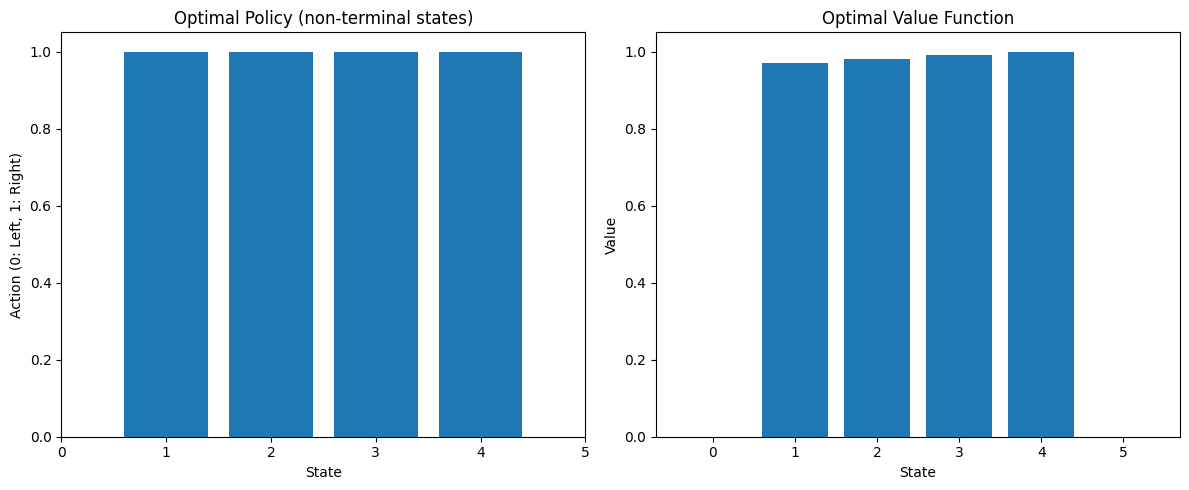

In [27]:
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # After defining the MDP
    
    # Initialize and run policy iteration
    vacuum_pi = PolicyIteration(vacuum_mdp)
    policy, value_function = vacuum_pi.run()
    
    # Print results
    print("\nFinal Policy:")
    policy_names = ["Left", "Right"]
    for s in vacuum_mdp['states']:
        if s in vacuum_mdp['terminal_states']:
            print(f"State {s} (Terminal): N/A")
        else:
            print(f"State {s}: {policy_names[policy[s]]}")
    
    print("\nValue Function:")
    for s, v in value_function.items():
        print(f"State {s}: {v:.4f}")
    
    # Visualize results
    plt.figure(figsize=(12, 5))
    
    # Plot policy (only for non-terminal states)
    plt.subplot(1, 2, 1)
    states = [s for s in vacuum_mdp['states'] if s not in vacuum_mdp['terminal_states']]
    policy_values = [policy[s] for s in states]
    plt.bar(states, policy_values)
    plt.xticks(vacuum_mdp['states'])
    plt.xlabel("State")
    plt.ylabel("Action (0: Left, 1: Right)")
    plt.title("Optimal Policy (non-terminal states)")
    
    # Plot value function
    plt.subplot(1, 2, 2)
    values = [value_function[s] for s in vacuum_mdp['states']]
    plt.bar(vacuum_mdp['states'], values)
    plt.xticks(vacuum_mdp['states'])
    plt.xlabel("State")
    plt.ylabel("Value")
    plt.title("Optimal Value Function")
    
    plt.tight_layout()
    plt.show()

### **1.3 D: (3 P)** Adapt your implementation to use Q-Values (state-action values) instead of state values to evaluate a given policy. Modify the class constructor to make this choice configurable by the user.

In [28]:
def _q_value_evaluation(self, policy, epsilon=1e-5, gamma=0.99):
    Q = {s: {a: 0 for a in self.actions} for s in self.states}
    V = {s: 0 for s in self.states}
    
    while True:
        delta = 0
        
        # Update Q-values
        for s in self.states:
            if s in self.terminal_states:
                continue
                
            for a in self.actions:
                old_q = Q[s][a]
                new_q = 0
                
                for s_next in self.P[s][a]:
                    prob = self.P[s][a][s_next]
                    reward = self.R[s][a][s_next]
                    
                    # For terminal states, value is 0
                    if s_next in self.terminal_states:
                        next_value = 0
                    else:
                        # Use the value of the next state according to the policy
                        next_action = policy[s_next]
                        next_value = V[s_next]
                    
                    new_q += prob * (reward + gamma * next_value)
                
                Q[s][a] = new_q
                delta = max(delta, abs(old_q - new_q))
        
        # Update V based on current policy
        for s in self.states:
            if s in self.terminal_states:
                V[s] = 0
            else:
                a = policy[s]
                V[s] = Q[s][a]
        
        if delta < epsilon:
            break
    
    self.Q = Q  # Store Q-values for later use
    return V

In [29]:
if __name__ == '__main__':
    # After visualizing the state-value results
    
    # Test with Q-values
    print("\nRunning policy iteration with Q-values:")
    vacuum_pi_q = PolicyIteration(vacuum_mdp, use_q_values=True)
    policy_q, value_function_q = vacuum_pi_q.run()
    
    print("\nFinal Policy (Q-values):")
    for s in vacuum_mdp['states']:
        if s in vacuum_mdp['terminal_states']:
            print(f"State {s} (Terminal): N/A")
        else:
            print(f"State {s}: {policy_names[policy_q[s]]}")
    
    print("\nValue Function (Q-values):")
    for s, v in value_function_q.items():
        print(f"State {s}: {v:.4f}")
    
    # Print Q-values
    print("\nQ-values:")
    for s in vacuum_mdp['states']:
        if s not in vacuum_mdp['terminal_states']:
            left_q = vacuum_pi_q.Q[s][0]
            right_q = vacuum_pi_q.Q[s][1]
            print(f"State {s}: Left: {left_q:.4f}, Right: {right_q:.4f}")


Running policy iteration with Q-values:
Policy converged after 2 iterations

Final Policy (Q-values):
State 0 (Terminal): N/A
State 1: Right
State 2: Right
State 3: Right
State 4: Right
State 5 (Terminal): N/A

Value Function (Q-values):
State 0: 0.0000
State 1: 0.9703
State 2: 0.9801
State 3: 0.9900
State 4: 1.0000
State 5: 0.0000

Q-values:
State 1: Left: 0.0000, Right: 0.0000
State 2: Left: 0.0000, Right: 0.0000
State 3: Left: 0.0000, Right: 0.0000
State 4: Left: 0.0000, Right: 0.0000


<div align="center" style="font-family: 'Garamond', serif; color: #333333;">
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
    <p style="color: #6c757d;">
        Please upload your submission via StudIP by 20:00 on April 24, 2024. If you encounter any issues with the upload process, please contact me in advance at <a href="mailto:laux@uni-bremen.de" style="color: #8b0000;">laux@uni-bremen.de</a>. Your submission must include:
    </p>
    <ul style="list-style-type: none; color: #6c757d;">
        <li>&#9472; A well-documented, precompiled notebook, containing the entire solution(s) along with outputs and plots if applicable</li>
        <li>&#9472; A markdown cell with the names and e-mail addresses of the contributing team members</li>
    </ul>
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
</div>